# Evidencia 1 (Avance Final) - Big Data
## Nombre: Celic Gabriel Hernández Archundia
## Matrícula: 2877240


In [392]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [505]:
df = pd.read_csv("casosCovid0202.csv")
#df

### 1. Número de casos confirmados por cada mes
Nacional
Casos = Y
Mes = X

In [479]:
columnas = list(df.columns) # "columnas" ahora es una lista que contiene todas las columnas 
# de "df" 
dias = columnas[3:] # "dias" ahora vale lo que hay en la variable "columnas"
# Con el [3:] estamos indicando que tome únicamente del 3er elemento de la tabla en
# adelante
min_dia = dias[0] # "min_dia" Valdrá lo que haya en el primer elemento
# del arreglos dias[]
max_dia = dias[-1] # "min_dia" Valdrá lo que haya en el último elemento
# del arreglos dias[]
años = ["2020","2021","2022","2023"]
#columnas
#dias

In [395]:
meses = [] # Creamos un arreglo llamado "meses"

for dia in dias: # Recorremos el arreglo dias elemento por elemento
    mes = dia[3:] # mes derá igual al elemento de "dia" pero sin contar los primeros 3 caaracteres
    if mes not in meses: # Si lo que valga mes no está en el arreglo meses, que se agregue
        meses.append(mes) # Añade los meses al arreglo meses[]


In [477]:
# Vamos a hacer un diccionario
def casos_por_mes(): 
    zeros = [0 for x in range(len(meses))] # Lo mismo que arriba pero comprimido
    resultados = dict(zip(meses,zeros)) # resultados valdrá lo que haya en el diccionario
    # zip sirve para unir dos arreglos separados.
    # dict los convierte en diccionarios
    
    for dia in dias: # Por cada elemento "dia" dentro del arreglo dias[]
        mes = dia[3:] # la variable "mes" valdrá lo que valga un elemento del arreglo dia[]
        # Sin tomar en cuenta los primeros 3 caracteres
        resultados[mes] = resultados[mes] + df[dia] # El diccionario "resultados"
        # Cuando "resultados" esté en el elemento indicado por la variable "mes", 
        # la clave "resultados" valdrá dicho mes y su valor será df[dia]
        # Es decir, lo que valga "dia" dentro de la tabla de "df"
        # df es la variable que posee el DataFrame
        
    return resultados

res = casos_por_mes() # res vale el resultado de la función
#res # Imprime el diccionario
res_df = pd.DataFrame(res) # res_df vale lo que se le proporcione al nuevo objeto de tipo DataFrame
# creado con el método pd.DataFrame(), en este caso, el diccionario de "res"
#pd.concat([ df["nombre"], res_df], axis = 'columns') # Con el axis lo pegamos
# por columnas, o sea verticalmente
# concat: Sirve para unir dos o más dataframes

#res_df # Usé 

In [506]:
res_df_array = res_df.iloc[32]
indice = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
diccionario = {"index":indice,"mes": meses,"casos": (res_df_array)}
diccionario_df = pd.DataFrame.from_dict(diccionario).set_index("index")
#(diccionario_df)

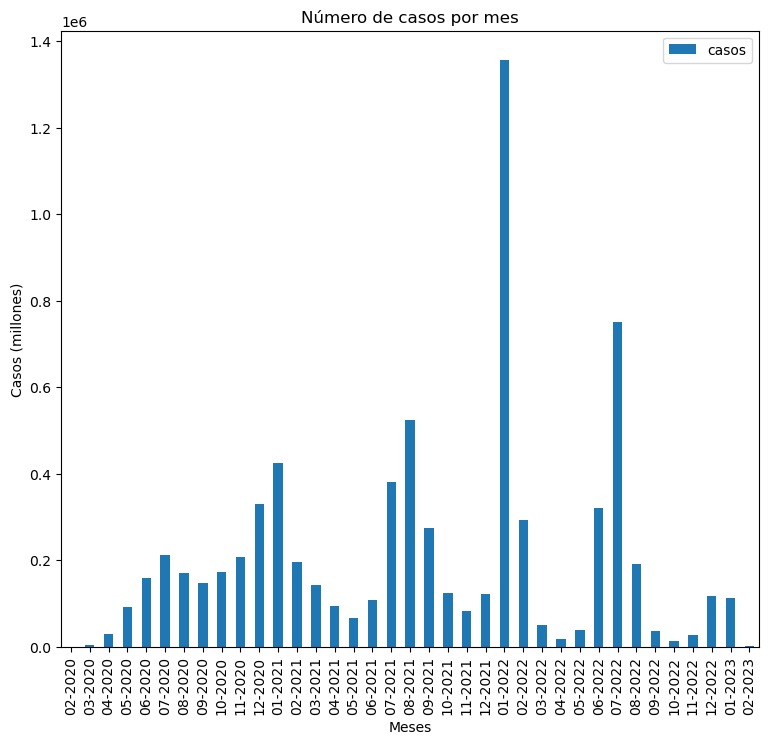

In [398]:
plt.rcParams["figure.figsize"] = (9,8)
diccionario_df.plot(x = 'mes', y = 'casos', kind='bar')
plt.title("Número de casos por mes")
plt.xlabel("Meses")
plt.ylabel("Casos (millones)")
plt.show()

#### Explicación
Este gráfico de barras muestra el número de casos confirmados de covid (en millones) por mes a nivel nacional, en México; desde los datos registrados en febrero del 2020, hasta los datos registrados en febrero del 2023. Mostrando que el mes con mayor número de casos fue en enero del 2022; con más 1.3 millones de casos confirmados. Seguido del mes de julio del 2022, con casi 800 mil casos. 

### 2. El promedio de casos confirmados por cada mes

In [480]:
def prom_casos_por_mes():
    zeros = [0 for x in range(len(meses))] 
    resultados = dict(zip(meses, zeros)) 
    num_dias = dict(zip(meses, zeros)) # num_dias será un diccionario que tenga
    # como clave a los "meses", y como valor los "zeros"
    
    for dia in dias:
        mes = dia[3:] # la variable "mes" valdrá lo que valga un elemento del arreglo dia[]
        # Sin tomar en cuenta los primeros 3 caracteres, o sea la fecha. Ejemplo: "02-01-2020"
        resultados[mes] = resultados[mes] + df[dia]
        # Ejemplo: 08-2020: 54
        num_dias[mes] = num_dias[mes] + 1 
        # num_dias[mes] accede al valor que posea la clave
        # Con el "+ 1" estamos sumando 1 a los ceros iniciales que estaban dentro de las claves
        # 
    #print(num_dias)
    
        
    for key in resultados: # Por cada elemento dentro del diccionario "resultados"
        # key toma el valor de una de las claves del diccionario
        resultados[key] = resultados[key] // num_dias[key]
        # resultados[key] mostraría el valor de la clave key
        # resultados[key] valdrá la división del valor de la clave key del
        # diccionario "resultados" entre el valor
        # de la clave key del diccionario "num_dias"
        # Conclusión: Está dividiendo los casos de Covid por día entre el
        # número de casos por mes. Y en este caso estamos omitiendo los decimales con el "//"
        
    return resultados

res2 = prom_casos_por_mes()
res_df2 = pd.DataFrame(res2)
#pd.concat([ df["nombre"], res_df], axis = 'columns')

In [481]:
res_df_array2 = res_df2.iloc[32]

diccionario = {"index":indice,"mes": meses,"casos": res_df_array2}
diccionario_df2 = pd.DataFrame.from_dict(diccionario).set_index("index")
#diccionario_df2

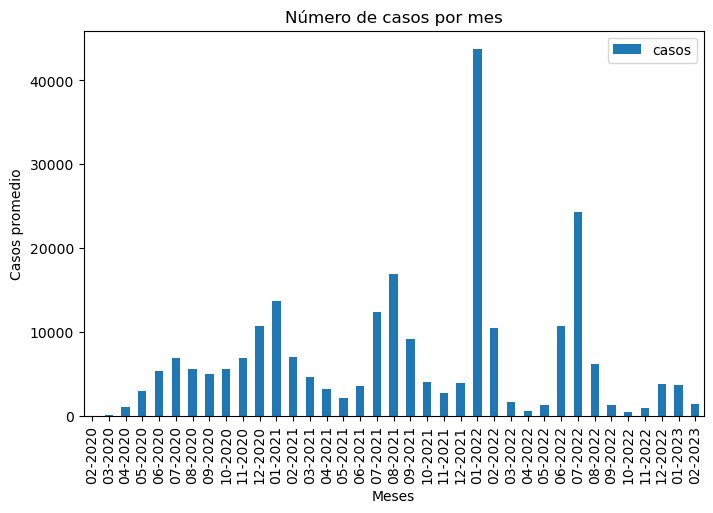

In [401]:
plt.rcParams["figure.figsize"] = (8,5)
diccionario_df2.plot(x = 'mes', y = 'casos', kind='bar')
plt.title("Número de casos por mes")
plt.xlabel("Meses")
plt.ylabel("Casos promedio")
plt.show()

#### Explicación
El gráfico anterior muestra el número de casos confirmados de covid promedio por mes a nivel nacional (en México); desde febrero del 2020, hasta febrero del 2023. Siendo, nuevamente, el mes de enero del 2022 el dato más notable (con más de 40 mil casos promedio). Seguido del mes de julio del 2022, con 25 mil casos promedio, aproximadamente.

### 3. Una función que muestre qué día de cada mes se presentó el mayor número de casos confirmados
Casos = Y
Día con mayores casos del mes = X

In [402]:
nacional = df[ df["nombre"] == "Nacional"][dias]

In [403]:
def max_dia_del_mes():
    zeros = [ 0 for x in range(len(meses)) ]
    # Guarda el valor de casos confirmados
    resultados_cantidad = dict(zip(meses,zeros))
    # Guarda el día máximo de casos confirmados por mes
    resultados = dict(zip(meses, zeros))
    
    for dia in dias:
        mes = dia[3:]
        casos_confirmados = list(nacional[dia].values)[0]
        if casos_confirmados > resultados_cantidad[mes]:
            resultados[mes] = dia
            resultados_cantidad[mes] = casos_confirmados
            
    return resultados

res = max_dia_del_mes()
#pd.DataFrame(list(res.values()), index=list(res.keys()), columns=["Día con más casos de Covid"])

In [482]:
def max_dia_del_mes():
    zeros = [ 0 for x in range(len(meses)) ]
    # Guarda el valor de casos confirmados
    resultados_cantidad = dict(zip(meses,zeros))
    # Guarda el día máximo de casos confirmados por mes
    resultados = dict(zip(meses, zeros))
    
    for dia in dias:
        mes = dia[3:]
        casos_confirmados = list(nacional[dia].values)[0]
        if casos_confirmados > resultados_cantidad[mes]:
            resultados[mes] = dia
            resultados_cantidad[mes] = casos_confirmados
            
    return resultados, resultados_cantidad

resDia, resCasos = max_dia_del_mes()

resDia_array = list(resDia.values())
resCasos_array = list(resCasos.values())

diccionario = {"dia": resDia_array,"casos": resCasos_array}
diccionario_df3 = pd.DataFrame(diccionario)
#diccionario_df3

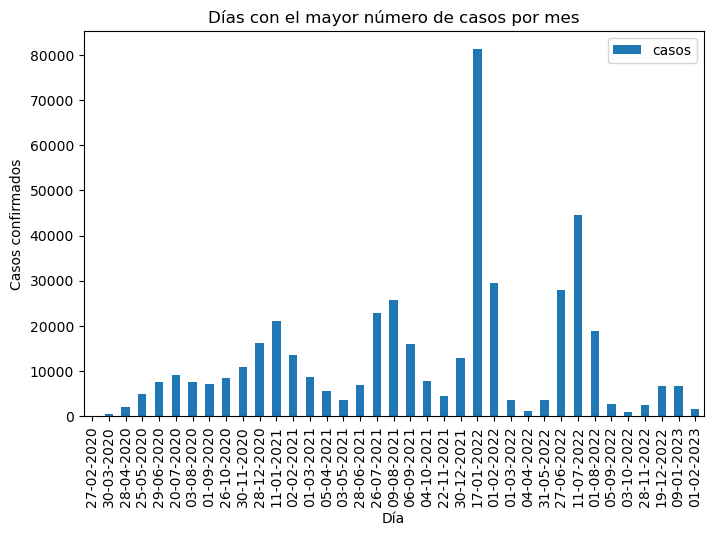

In [405]:
plt.rcParams["figure.figsize"] = (8,5)
diccionario_df3.plot(x = 'dia', y = 'casos', kind='bar')
plt.title("Días con el mayor número de casos por mes")
plt.xlabel("Día")
plt.ylabel("Casos confirmados")
plt.show()

#### Explicación
El gráfico de barras anterior muestra el número de casos confirmados de covid (en México); más concretamente, el día de cada mes en los que hubo mayores casos; desde febrero del 2020, hasta febrero del 2023. Siendo el 17 de enero del 2022 el día en que hubo más casos (arriba de 80 mil). Seguido del 11 de julio del 2022, con más de 40 mil casos. 

### 4. Una función que muestre el porcentaje de la población afectada por mes
Porcentaje = Y Mes = X

In [406]:
casosTotales = 0
for caso in res_df_array:
    casosTotales += caso
print(casosTotales)

7381305


In [497]:
diccionario = {"mes": meses,"porcentaje": (res_df_array / 127792286)*100}
diccionario_df4 = pd.DataFrame.from_dict(diccionario)
porcentaje = diccionario["porcentaje"]
porcentaje_array = list(porcentaje)
porcentaje_redondeado = np.round(porcentaje_array,3)
#(diccionario_df4)

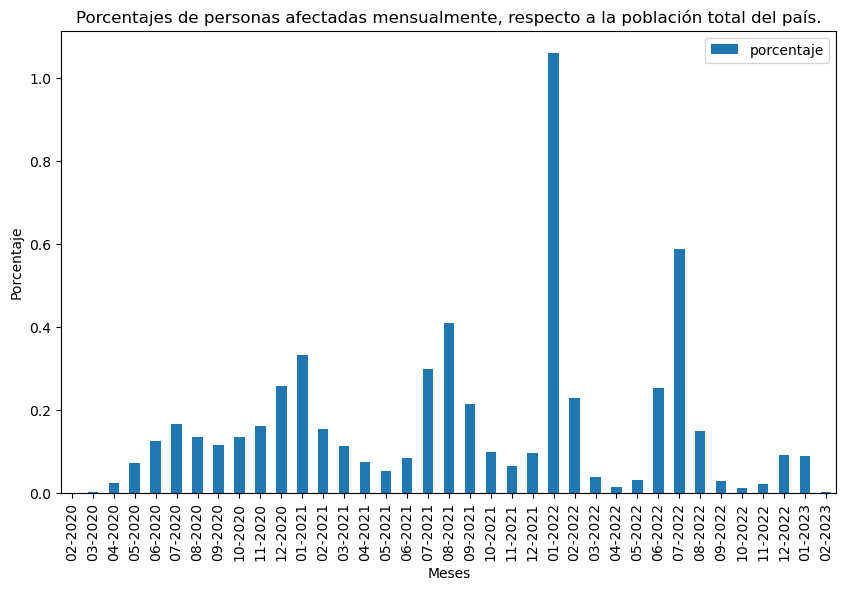

In [500]:
plt.rcParams["figure.figsize"] = (10,6)
diccionario_df4.plot(x = 'mes', y = 'porcentaje', kind='bar')
plt.title("Porcentajes de personas afectadas mensualmente, respecto a la población total del país.")
plt.xlabel("Meses")
plt.ylabel("Porcentaje")
plt.show()

#### Explicación
La gráfica anterior muestra el porcentaje de población afectada por covid mensualmente a nivel nacional (en México); desde febrero del 2020, hasta febrero del 2023; respecto a la población total del país (127 millones de personas, aproximadamente). Siendo, como ya se vio en gráficos anteriores, el mes de enero del 2022 con más personas afectadas (más del 1% de la población total). Seguido del mes de julio del 2022, con un 0.6%, aproximadamente. Más abajo, se encuentran diferentes representaciones de esta misma información.

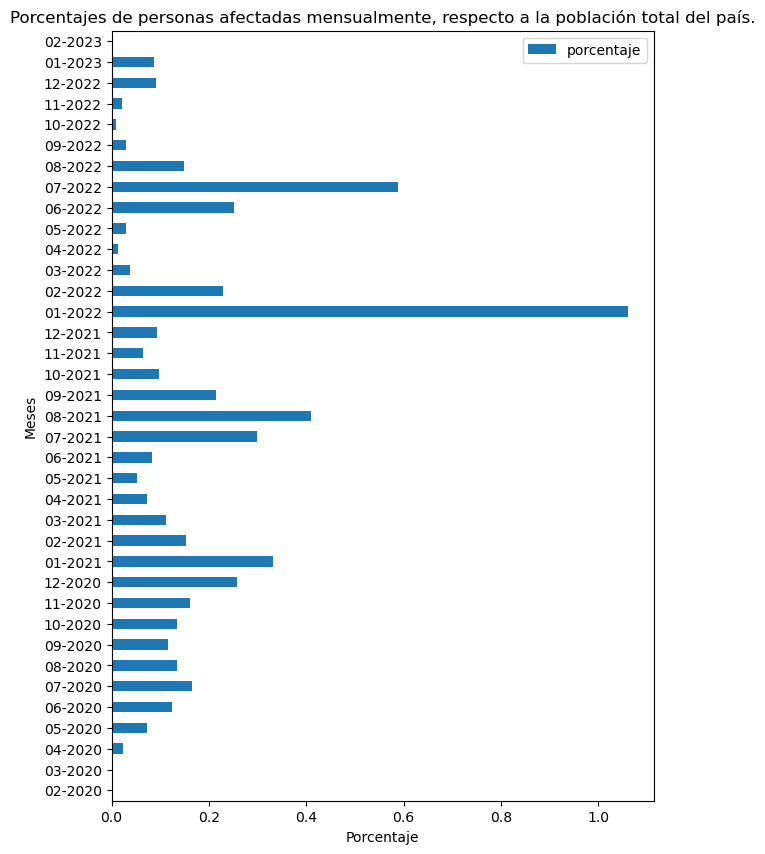

In [501]:
plt.rcParams["figure.figsize"] = (7,10)
diccionario_df4.plot(x = 'mes', y = 'porcentaje', kind='barh')
plt.title("Porcentajes de personas afectadas mensualmente, respecto a la población total del país.")
plt.xlabel("Porcentaje")
plt.ylabel("Meses")
plt.show()

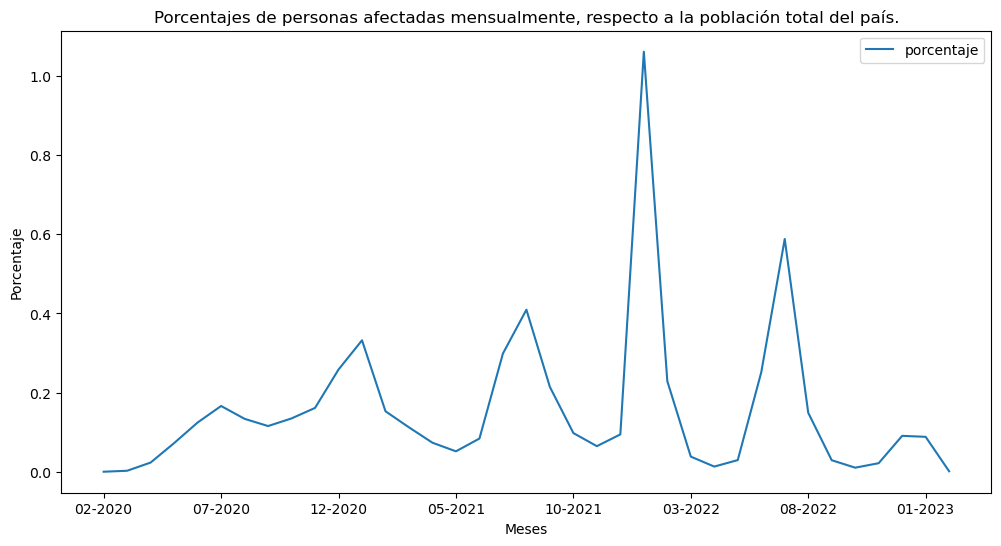

In [502]:
plt.rcParams["figure.figsize"] = (12,6)
diccionario_df4.plot(x = 'mes', y = 'porcentaje', kind='line')
plt.title("Porcentajes de personas afectadas mensualmente, respecto a la población total del país.")
plt.xlabel("Meses")
plt.ylabel("Porcentaje")
plt.show()

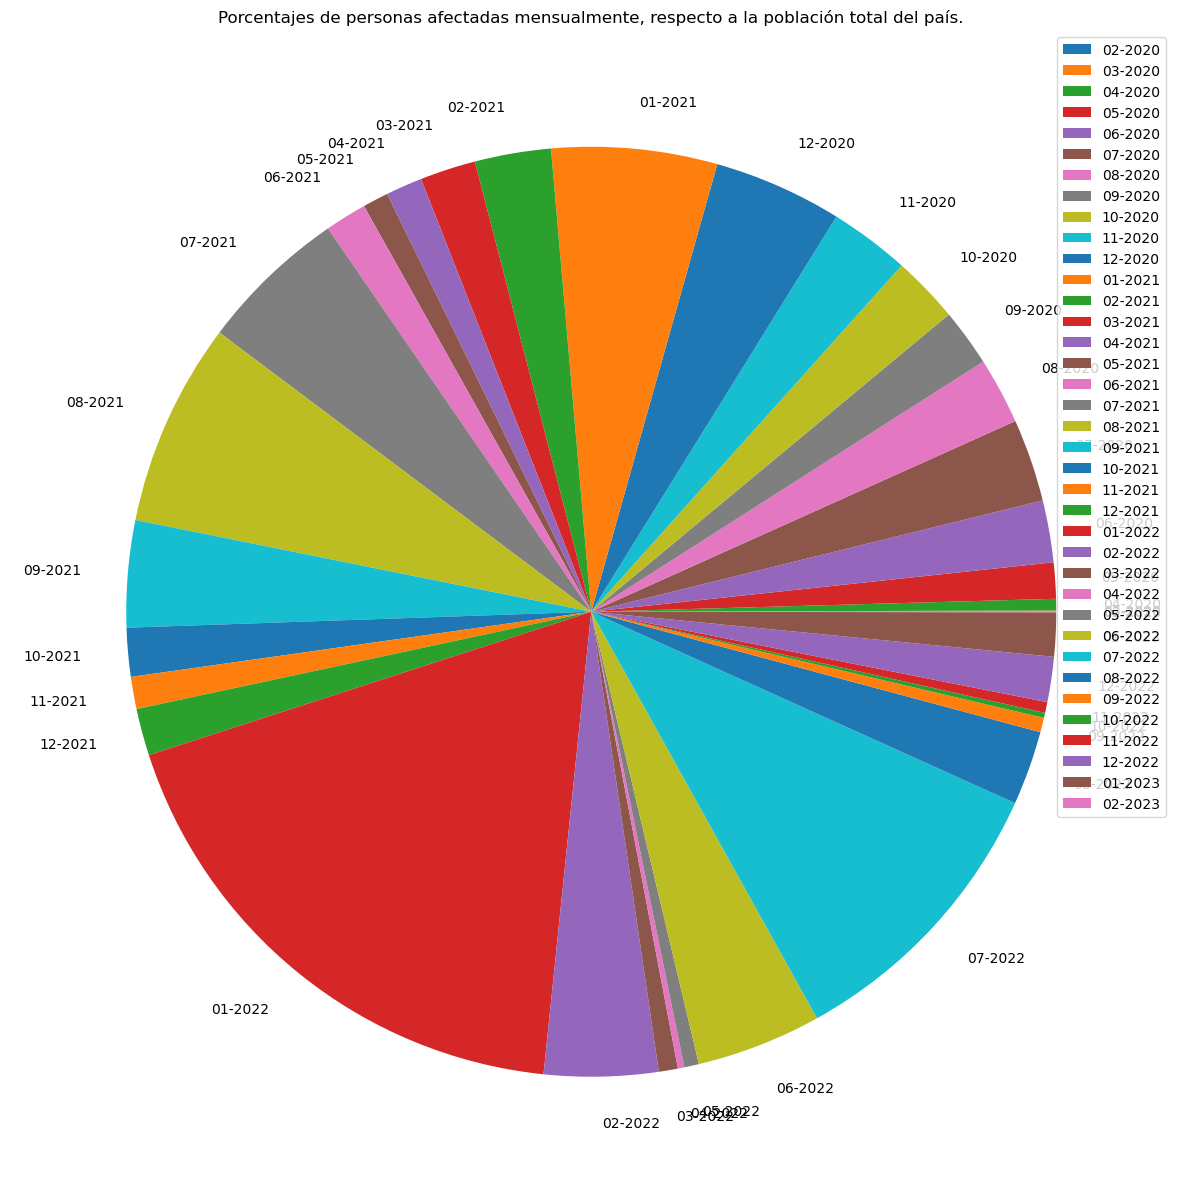

In [503]:
plt.rcParams["figure.figsize"] = (15,20)
diccionario_df4.plot(x = 'mes', y = 'porcentaje', kind='pie')
plt.title("Porcentajes de personas afectadas mensualmente, respecto a la población total del país.")
plt.xlabel("")
plt.ylabel("")
plt.show()

### 5. Describe y desarrolla una función que presente alguna otra información relevante de acuerdo con tus opiniones
#### 5.1. Muestra el mayor número de casos por día en México.

In [484]:
df2 = df
df2 = df2.drop([32])
df2 = df2.drop(["cve_ent", "poblacion","nombre"], axis = 1)
df2_dict = df2.to_dict()

def mayorNumCasosDia():
    zeros = [0 for x in range(len(meses))]
    resultados = dict(zip(meses, zeros)) 
    casosMax = 0
    mayorNumCasosDia = []
    mayorNumCasosMes = []
    dias = df2
    i = 1
    num = 0
    nuevoArreglo = []
    
    for clave, valor in df2_dict.items():
        #print("{0} --> {1}".format(clave, valor))
        for estado, casos in valor.items():
            if casos > casosMax:
                casosMax = casos
        mayorNumCasosDia.append(casosMax)
        casosMax = 0
            
        
    dia_casos = dict(zip(dias,mayorNumCasosDia))
    
    
    
    return dia_casos

res = mayorNumCasosDia()
res_df5 = res
res_df5_array = list(res_df5.values())
#res_df5_array

In [483]:
diccionario = {"dias": dias,"casos": res_df5_array}
diccionario_df5 = pd.DataFrame.from_dict(diccionario)
#diccionario_df5

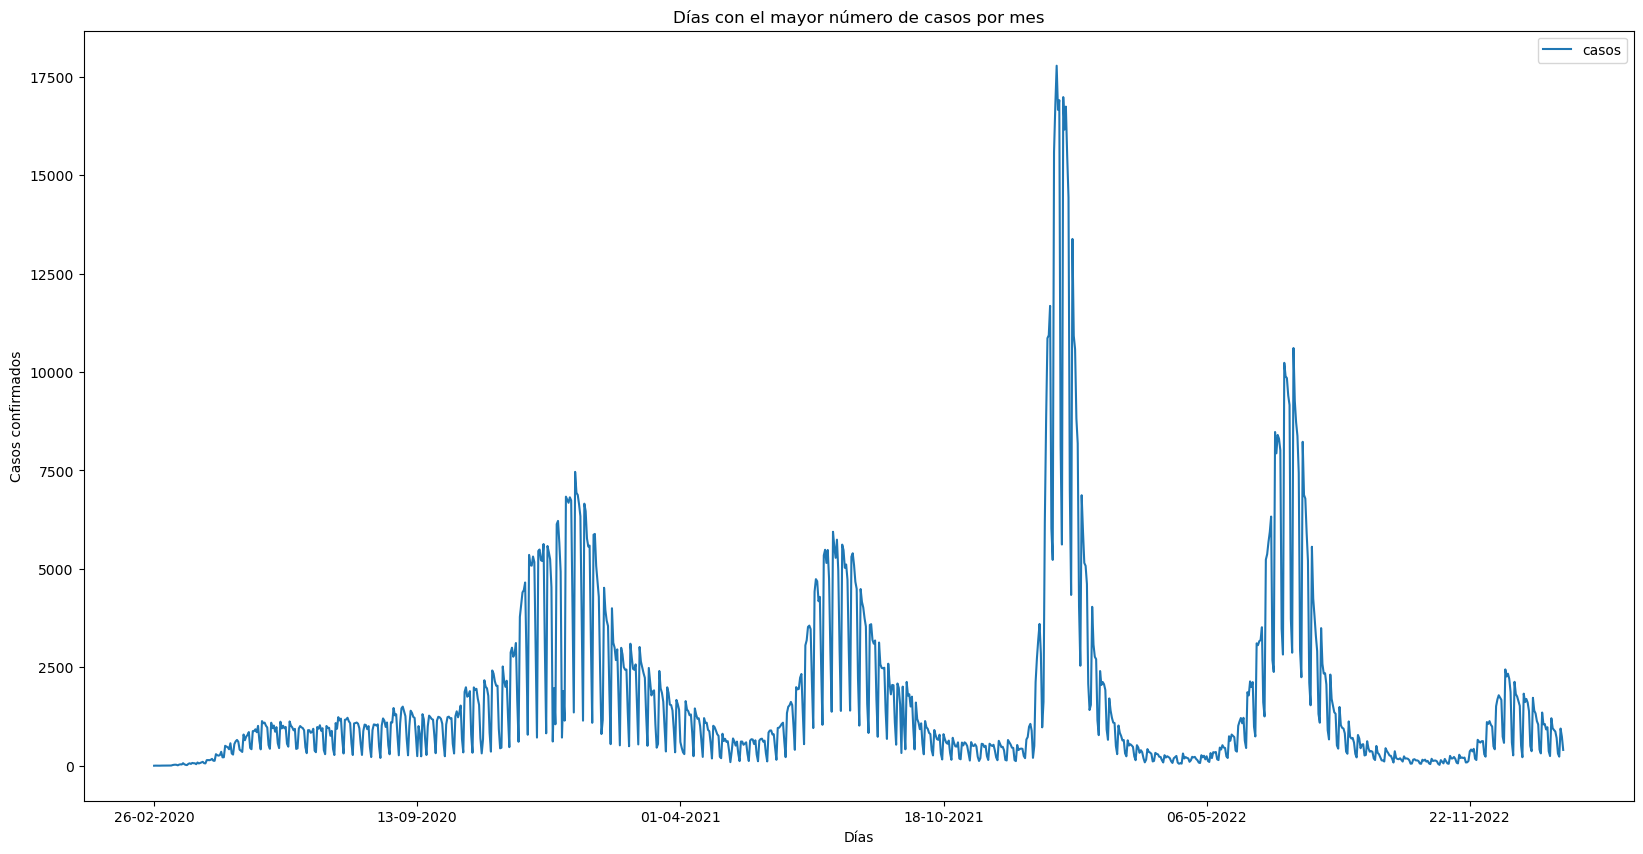

In [416]:
plt.rcParams["figure.figsize"] = (20,10)
diccionario_df5.plot(x = 'dias', y = 'casos', kind='line')
plt.title("Días con el mayor número de casos por mes")
plt.xlabel("Días")
plt.ylabel("Casos confirmados")
plt.show()

#### Explicación
En la gráfica lineal anterior se ven mostrados el número de casos confirmados por covid por día a nivel nacional (en México); desde febrero del 2020, hasta febrero del 2023. Mostrando que los días con mayor número de casos se presentaron en la mediana entre el 18 de octubre del 2021 y el 6 de mayo del 2022 (llegando hasta más de 12 mil 500 casos por esas fechas). 

#### 5.2. Muestra el número de casos por año

In [470]:
#res_df_array6 = res_df.iloc[32]
#res_df_array6

sumaA = 0
sumaB = 0
sumaC = 0
sumaD = 0

for fecha, caso in res_df.items():
    año = fecha[3:]
    if año == "2020":
        sumaA += caso
    if año == "2021":
        sumaB += caso
    if año == "2022":
        sumaC += caso
    if año == "2023":
        sumaD += caso

sumaA = (sumaA.sum())
sumaB=(sumaB.sum())
sumaC=(sumaC.sum())
sumaD = (sumaD.sum())
años_array = [sumaA,sumaB,sumaC,sumaD]
años_array

[1522878, 2536021, 3208271, 114135]

In [485]:
diccionario = {"año": años,"casos": años_array}
diccionario_df6 = pd.DataFrame.from_dict(diccionario)
#diccionario_df6

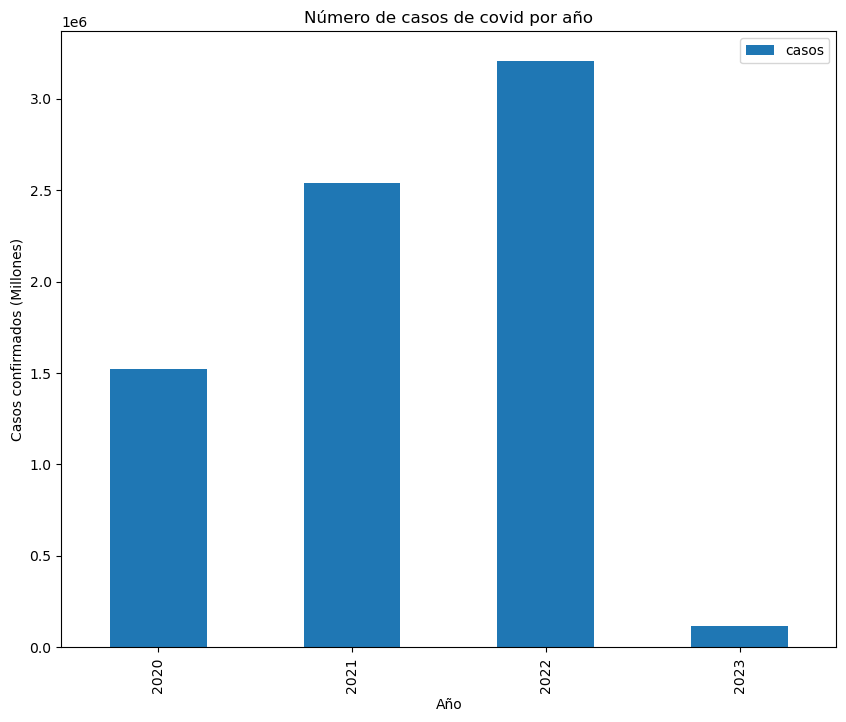

In [486]:
plt.rcParams["figure.figsize"] = (10,8)
diccionario_df6.plot(x = 'año', y = 'casos', kind='bar')
plt.title("Número de casos de covid por año")
plt.xlabel("Año")
plt.ylabel("Casos confirmados (Millones)")
plt.show()

#### Explicación
La gráfica de barras anterior muestra una comparación del número de casos confirmados por covid por año a nivel nacional, en México; desde febrero del 2020, hasta principios del 2023. Siendo 2022 el año con más casos confirmados, con más de 3 millones de personas afectadas por el virus.

#### 5.3. Muestra el porcentaje de casos confirmados mensualmente respecto a la población contagiada por Covid.

In [493]:
casosTotales = 0
for caso in res_df_array:
    casosTotales += caso
print(casosTotales)

7381305


In [494]:
diccionario = {"mes": meses,"porcentaje": (res_df_array / casosTotales)*100}
diccionario_df7 = pd.DataFrame.from_dict(diccionario)
porcentaje = diccionario["porcentaje"]
porcentaje_array = list(porcentaje)
porcentaje_redondeado = np.round(porcentaje_array,3)
#(diccionario_df7)

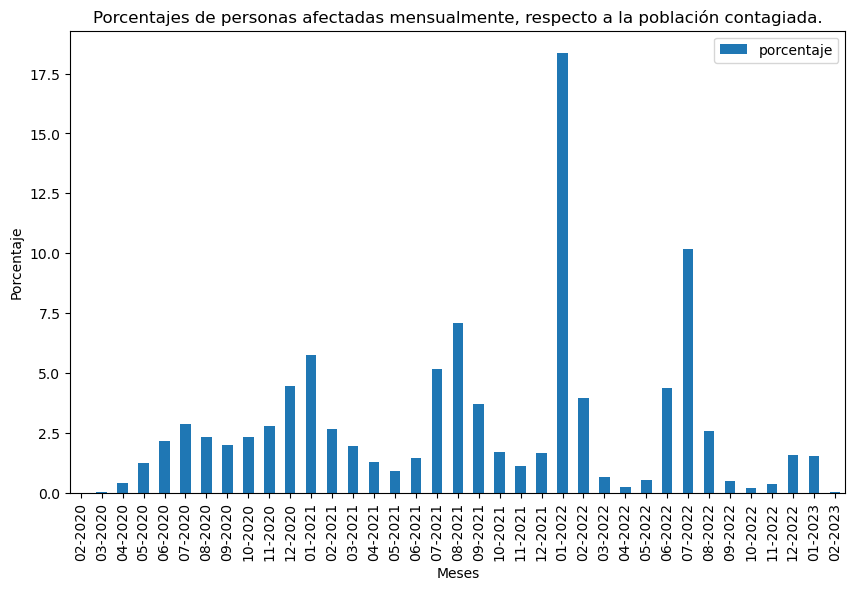

In [504]:
plt.rcParams["figure.figsize"] = (10,6)
diccionario_df7.plot(x = 'mes', y = 'porcentaje', kind='bar')
plt.title("Porcentajes de personas afectadas mensualmente, respecto a la población contagiada.")
plt.xlabel("Meses")
plt.ylabel("Porcentaje")
plt.show()

#### Explicación
La gráfica anterior muestra el porcentaje de población afectada por covid mensualmente a nivel nacional (en México); desde febrero del 2020, hasta febrero del 2023; respecto a la población contagiada (7 millones de casos confirmados, aproximadamente). Siendo, como ya se vio en gráficos anteriores, el mes de enero del 2022 con más personas afectadas (más del 17.5% de los casos de un 100% de población contagiada). Seguido del mes de julio del 2022, con poco más del 10% de los casos de población afectada.